In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
PREC = 6
title_prop = {"font":"serif","color":"blue","size":20}
label_prop = {"font":"serif","color":"darkred","size":15}

In [4]:
df = pd.read_csv("data/train_final.csv")

In [5]:
df.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0


In [6]:
len(df)

199662

In [7]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [8]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0


In [9]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')

In [10]:
temp_df = pd.read_csv("data/random_forest_data.csv")

In [11]:
temp_df.head()

,Unnamed: 0,department_id,aisle,aisle_id
0,0,-0.998356,0.367240,-0.716729
1,1,-0.998356,0.367240,-0.716729
2,2,-0.998356,-0.220594,-0.332216
3,3,-0.998356,-0.220594,-0.332216
4,4,-0.998356,-0.220594,-0.332216


In [12]:
df["aisle_id"].unique()

array([ 38,  52,  58,  37, 129,  79,  34,  42, 116, 119, 113,  24, 123,
        32,  83,  16])

In [13]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0


In [14]:
#EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [16]:
#Univariate Analysis

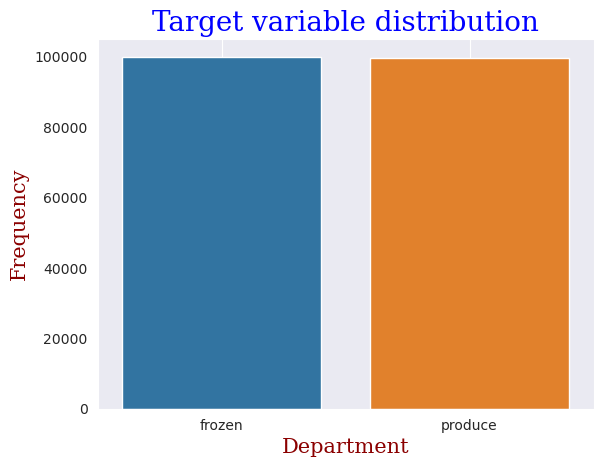

In [17]:
#target variable distribution
sns.countplot(data=df,x="department")
plt.xlabel("Department",fontdict=label_prop)
plt.ylabel("Frequency",fontdict=label_prop)
plt.title("Target variable distribution",fontdict=title_prop)
plt.grid()
plt.show()

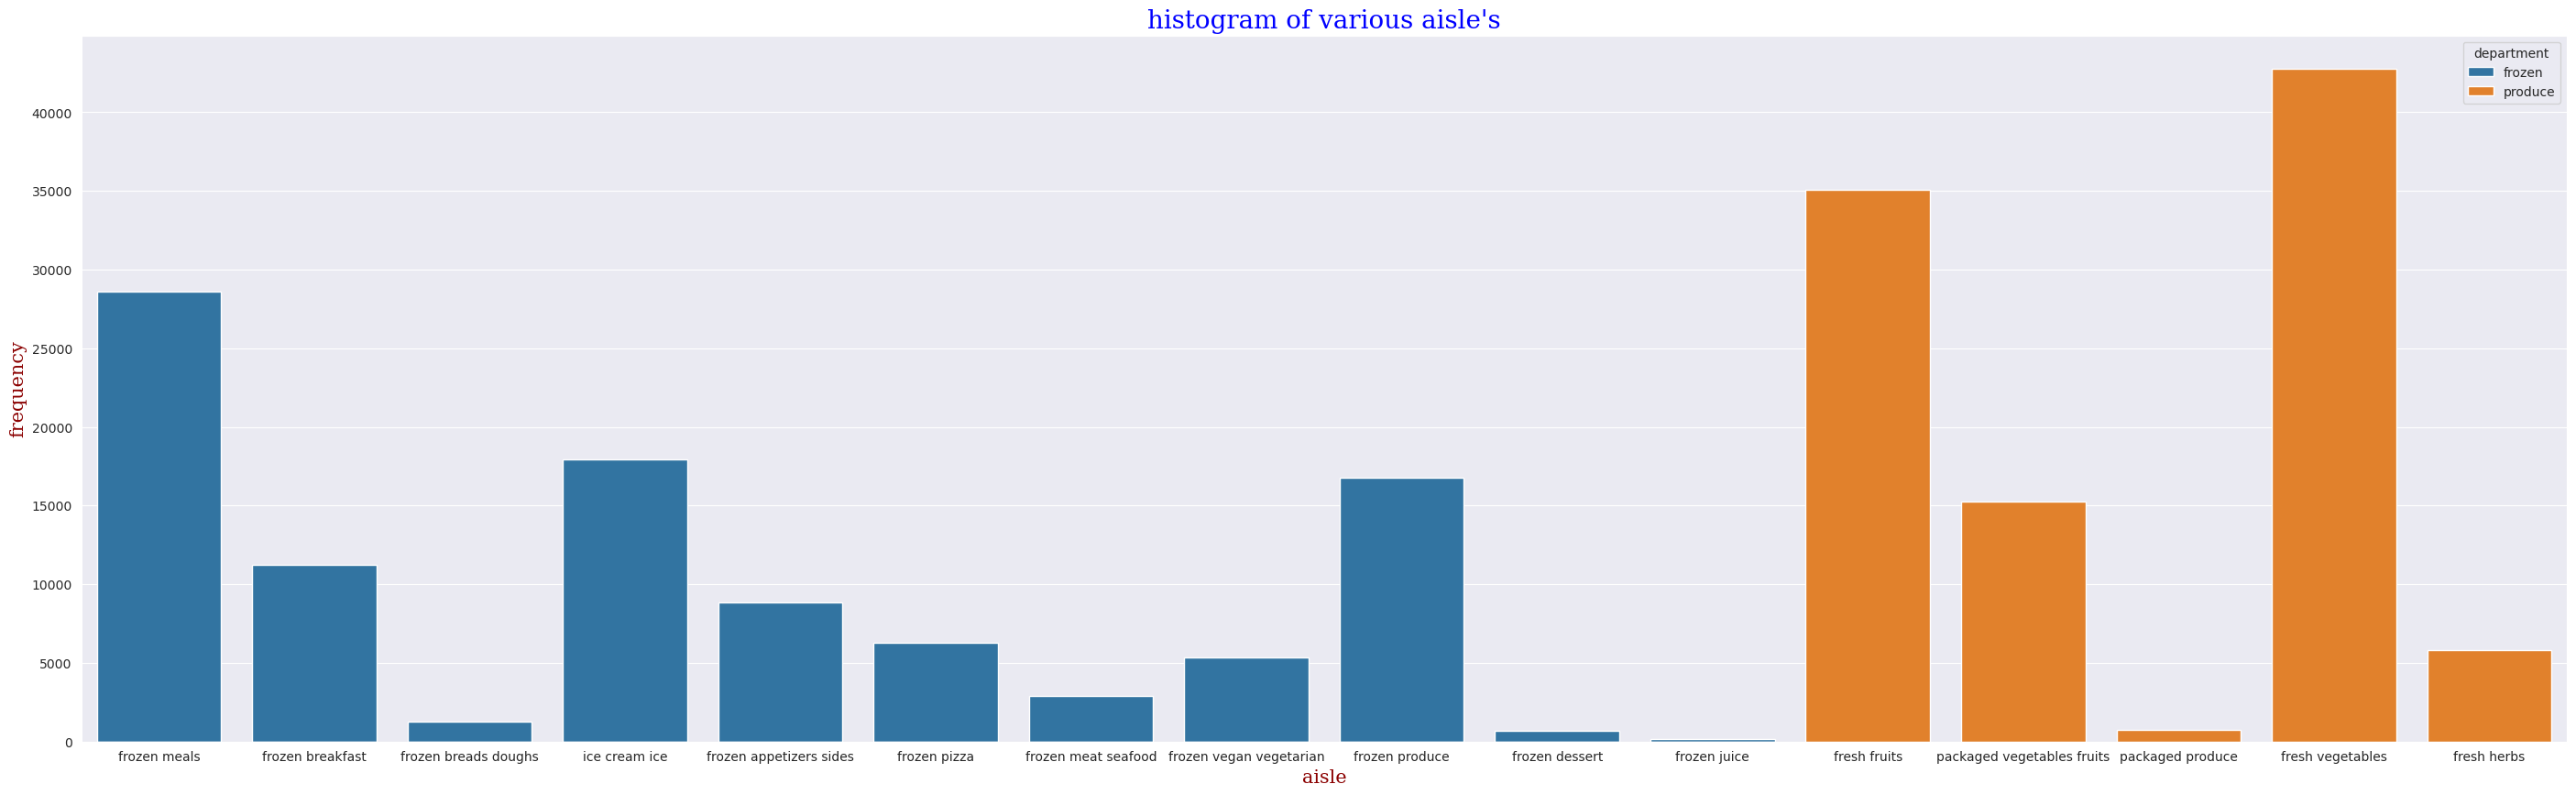

In [18]:
#number of aisles in the dataset
plt.figure(figsize=(35,10))
sns.countplot(df,x="aisle",width=0.8,hue="department",dodge=False)
plt.title("histogram of various aisle's",fontdict=title_prop)
plt.xlabel("aisle",fontdict=label_prop)
plt.ylabel("frequency",fontdict=label_prop)
plt.show()

In [19]:
#number of orders by the user

In [20]:
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199657,3332063,29487,8,1,Roma Tomato,83,4,fresh vegetables,produce,165253,prior,12,0,9,5.0
199658,3332063,26209,3,1,Limes,24,4,fresh fruits,produce,165253,prior,12,0,9,5.0
199659,3332063,44142,7,1,Red Onion,83,4,fresh vegetables,produce,165253,prior,12,0,9,5.0
199660,3332063,41259,5,1,Poblano Pepper,83,4,fresh vegetables,produce,165253,prior,12,0,9,5.0


In [21]:
temp_ = df.groupby(["user_id"])["order_id"].agg(lambda x:len(x.unique())).reset_index(name="order_count").set_index("user_id")

In [22]:
temp_.sort_values(by="order_count")

,order_count
user_id,
123900,11
94109,11
179588,12
25091,13
154657,14
...,...
150840,100
103593,100
174046,100


In [23]:
temp_["order_count"].value_counts().sort_values(ascending=False)

43    18
99    17
48    17
47    16
66    15
      ..
13     1
15     1
79     1
12     1
18     1
Name: order_count, Length: 90, dtype: int64

In [24]:
temp_["order_count"].sum()

37808

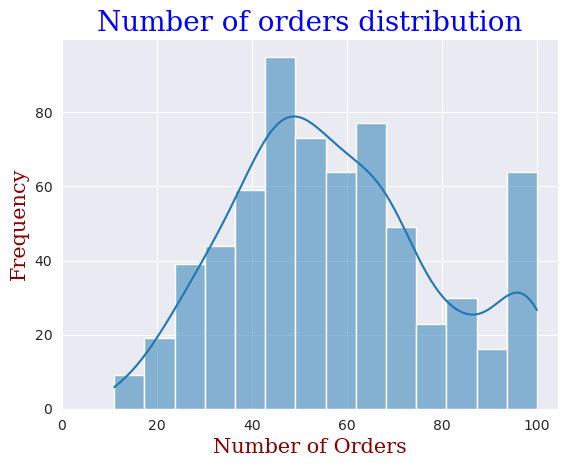

In [25]:
sns.histplot(data=temp_,x="order_count",kde=True) #kde_kws not working properly
plt.xticks(list(range(0,120,20)))
plt.xlabel("Number of Orders",fontdict=label_prop)
plt.ylabel("Frequency",fontdict=label_prop)
plt.title("Number of orders distribution",fontdict=title_prop)

plt.show()

Most people in the dataset ordered between 40 and 80 items in our dataset

In [26]:
# freequently reordered items

In [27]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5722,35469,7,1,Enchilada Black Bean Vegetable,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
1,5722,45613,10,1,Pad Thai,38,1,frozen meals,frozen,19102,prior,45,5,10,7.0
2,5722,41842,4,1,Organic Gluten Free Chia Plus with Quinoa & Am...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
3,5722,19448,12,1,Organic Gluten Free & Wheat Free Pumpkin Spice...,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0
4,5722,24195,1,1,Tofu Scramble,52,1,frozen breakfast,frozen,19102,prior,45,5,10,7.0


In [55]:
temp_ = df[df["reordered"] == 1]["product_name"].value_counts().reset_index()

In [56]:
temp_

,index,product_name
0,Organic Baby Spinach,2671
1,Bag of Organic Bananas,2616
2,Banana,2577
3,Organic Strawberries,2514
4,Organic Hass Avocado,2472
...,...,...
2652,Rich and Creamy Coffee Grand Ice Cream,1
2653,Brownie Batter Core,1
2654,Orange Sesame Chicken Flavorful Asian Inspirat...,1
2655,Meat-Free Savory Stuffed Turkey,1


In [57]:
temp_.columns = ["product_name","count"]

In [58]:
temp_["product_name"].nunique()

2657

In [59]:
temp_

,product_name,count
0,Organic Baby Spinach,2671
1,Bag of Organic Bananas,2616
2,Banana,2577
3,Organic Strawberries,2514
4,Organic Hass Avocado,2472
...,...,...
2652,Rich and Creamy Coffee Grand Ice Cream,1
2653,Brownie Batter Core,1
2654,Orange Sesame Chicken Flavorful Asian Inspirat...,1
2655,Meat-Free Savory Stuffed Turkey,1


In [60]:
sum_count = temp_["count"].sum()
temp_ = temp_.sort_values(by="count",key=lambda x:-1*x)
temp_["reorder"] = (temp_["count"]/sum_count)

In [62]:
temp_["reorder"] = temp_["reorder"]*100

In [63]:
temp_

,product_name,count,reorder
0,Organic Baby Spinach,2671,1.576816
1,Bag of Organic Bananas,2616,1.544347
2,Banana,2577,1.521323
3,Organic Strawberries,2514,1.484131
4,Organic Hass Avocado,2472,1.459337
...,...,...,...
2458,Fully Husked & Trimmed Super Sweet Corn,1,0.000590
2457,Organic Cooked Beets,1,0.000590
2456,Star Fruit,1,0.000590
2473,Ultimate Stir Fry Mixed Vegetables,1,0.000590


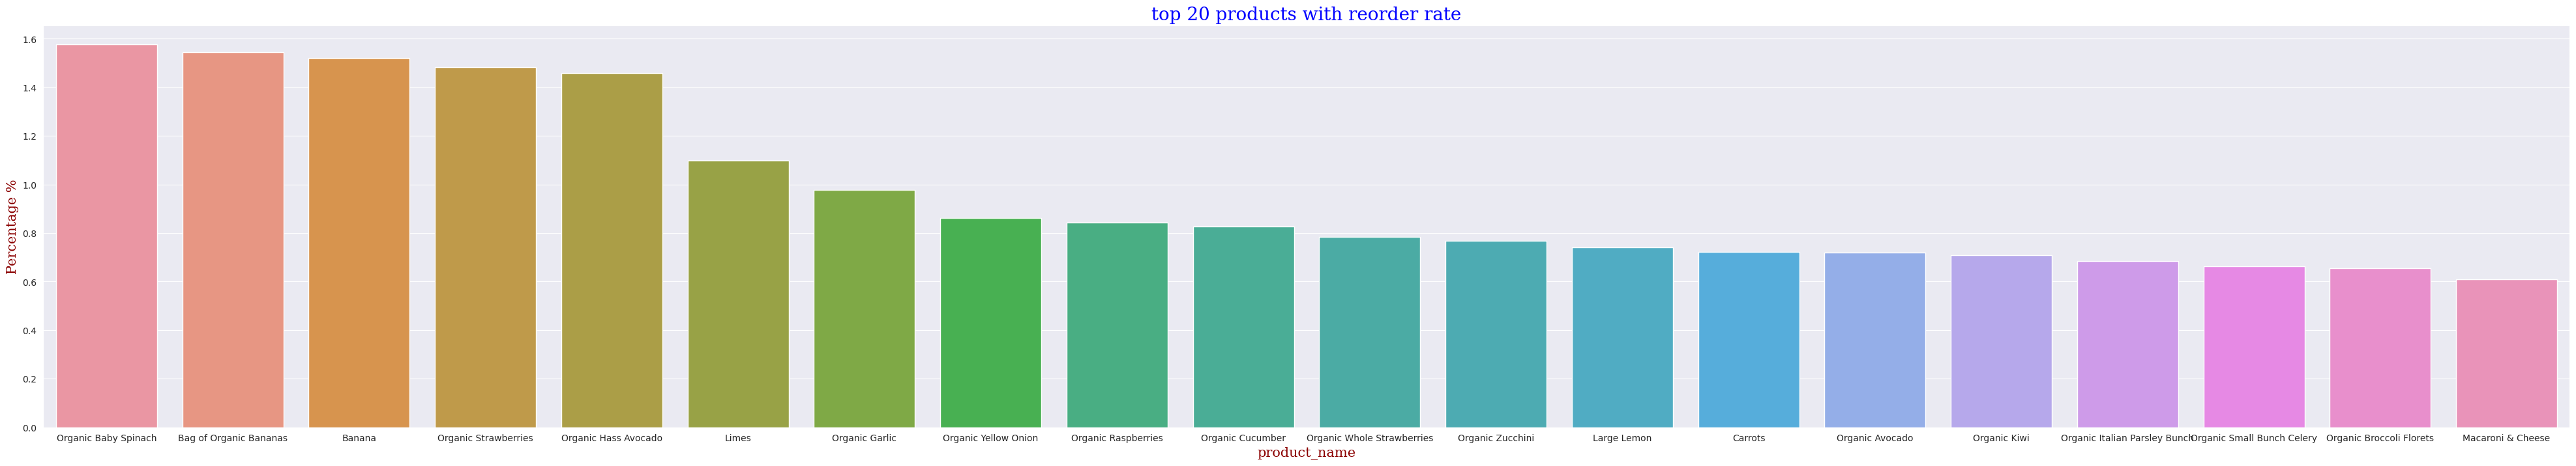

In [70]:
plt.figure(figsize=(50,8))
sns.barplot(data=temp_.iloc[:20],x="product_name",y="reorder")
plt.xlabel("product_name",fontdict=label_prop)
plt.ylabel("Percentage %",fontdict=label_prop)
plt.title("top 20 products with reorder rate",fontdict=title_prop)
plt.show()

In [96]:
# products sold in aisle reordered vs not reordered
#fig,ax = plt.subplots(1,2)
temp_1 = df[df["reordered"] == 1]["aisle"].value_counts().reset_index()
temp_1.columns = ["aisle","count"]
temp_1 = temp_1.set_index("aisle")
temp_k = temp_1.__deepcopy__()
temp_k["count"] = temp_k["count"]/temp_k["count"].sum()
temp_k = list(temp_k["count"])


In [124]:
# products sold in aisle reordered vs not reordered
#fig,ax = plt.subplots(1,2)
temp_2 = df[df["reordered"] == 0]["aisle"].value_counts().reset_index()
temp_2.columns = ["aisle","count"]
temp_2 = temp_2.set_index("aisle")
temp_k2 = temp_2.__deepcopy__()
temp_k2["count"] = temp_k2["count"]/temp_k2["count"].sum()
temp_k2 = list(temp_k2["count"])


/tmp/ipykernel_546495/18141197.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


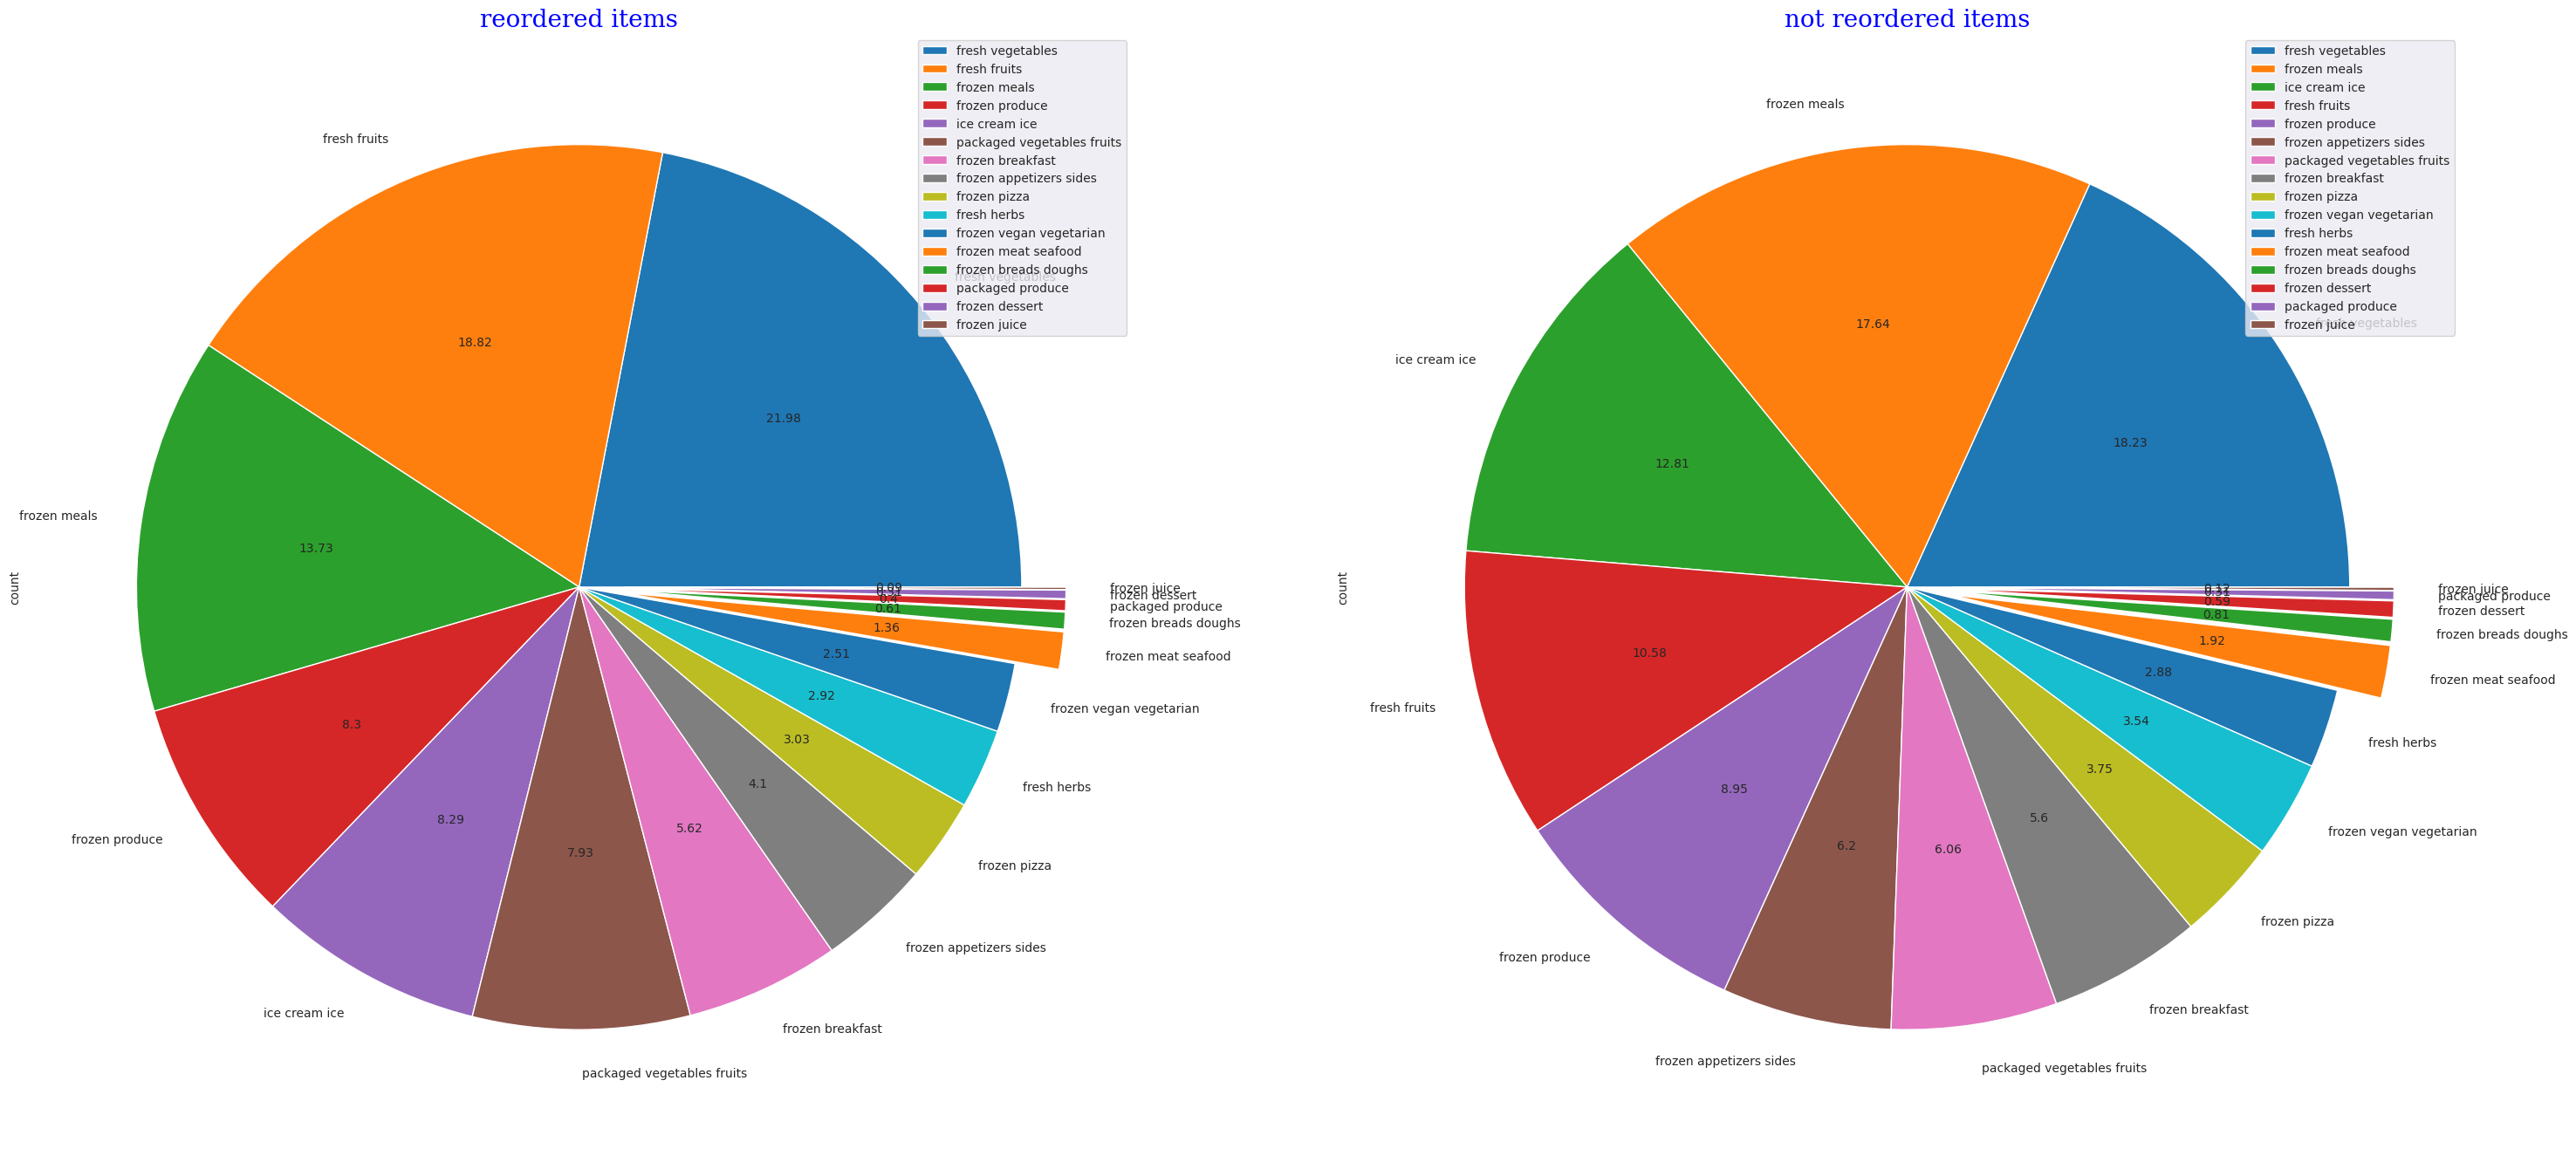

<Figure size 640x480 with 0 Axes>

In [125]:
explode_ = []
for i in range(len(temp_k)):
    if temp_k[i] < 0.02:
        explode_.append(0.1)
    else:
        explode_.append(0)
font_pie = {"size": 10}
fig,ax = plt.subplots(1,2,figsize=(36,18))
plt.figure()
temp_1.plot(
    kind="pie",
    y="count",
    autopct=lambda x:np.round(x,2),
    explode=tuple(explode_),
    textprops=font_pie,
    ax = ax[0],
)
ax[0].legend(loc="upper right")
ax[0].set_title("reordered items",fontdict=title_prop)
explode_ = []
for i in range(len(temp_k2)):
    if temp_k2[i] < 0.02:
        explode_.append(0.1)
    else:
        explode_.append(0)
font_pie = {"size": 10}
temp_2.plot(
    kind="pie",
    y="count",
    autopct=lambda x:np.round(x,2),
    explode=tuple(explode_),
    textprops=font_pie,
    ax = ax[1],
)
ax[1].legend(loc="upper right")
ax[1].set_title("not reordered items",fontdict=title_prop)
fig.show()

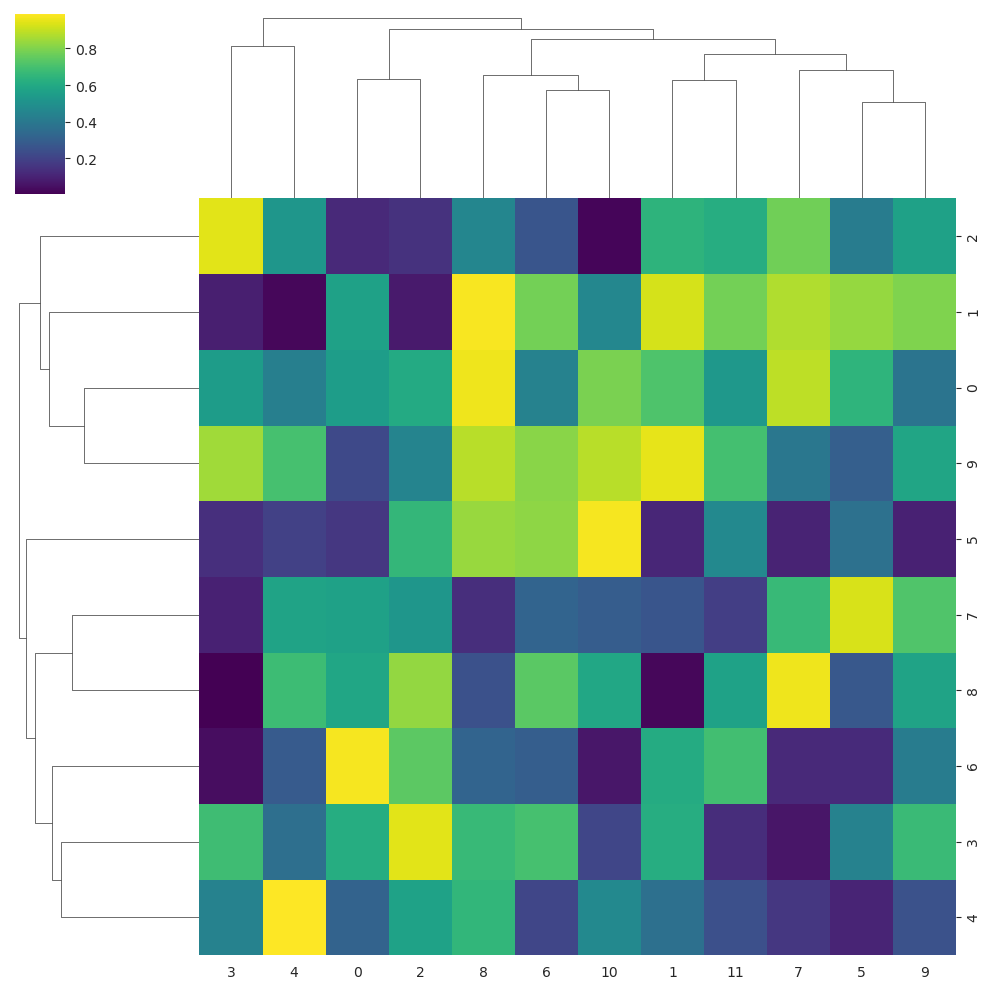

In [126]:
import seaborn as sns
import numpy as np

# Generate a random dataset
np.random.seed(0)
data = np.random.rand(10, 12)

# Create a clustered heatmap using clustermap
sns.clustermap(data, cmap="viridis")

# Display the plot
plt.show()

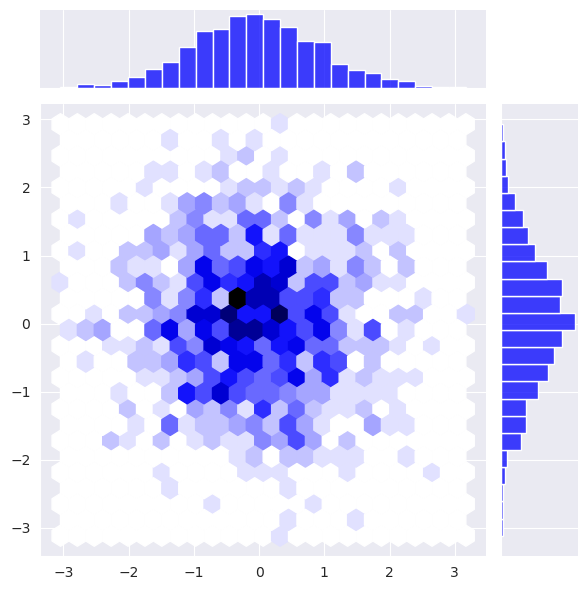

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# Create a hexbin plot
sns.jointplot(x=x, y=y, kind='hex', color='blue')

# Display the plot
plt.show()

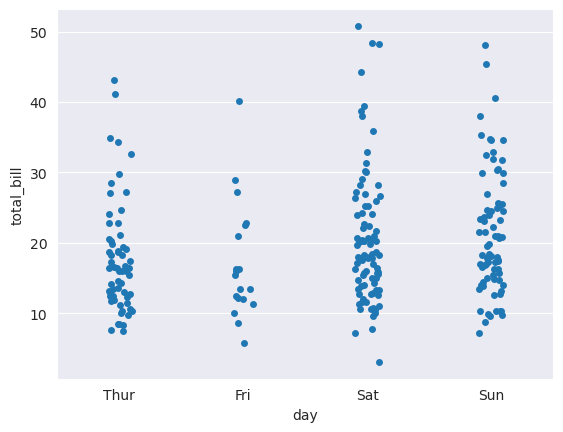

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate sample data
data = sns.load_dataset("tips")

# Create a strip plot
sns.stripplot(x="day", y="total_bill", data=data, jitter=True)

# Display the plot
plt.show()
